In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#sns.set (style="white")
#sns.set (style="whitegrid", color_codes=True)
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus as pydot
import graphviz
from IPython.display import display
from sklearn import tree
from os import system


In [4]:
bank_df = pd.read_csv(r'C:\Users\Arulprakash_palanive\Desktop\Ensemble\bank-full.csv')
print('data shape :', bank_df.shape)
bank_df.head().T

data shape : (45211, 17)


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [5]:
bank_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
cat_col=['default','housing','loan','Target']
for cat in bank_df[cat_col]:
    bank_df[cat]=bank_df[cat].apply(lambda x: 1 if x=='yes' else 0)

In [10]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Customers Average age : 40.94


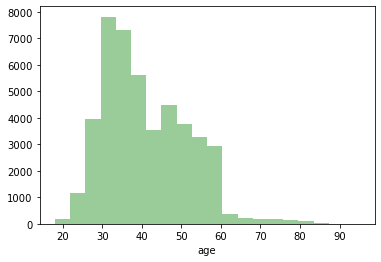

In [11]:
print('Customers Average age :', round(bank_df.age.mean(),2))
sns.distplot(bank_df.age, kde=False, bins=20, color='g');

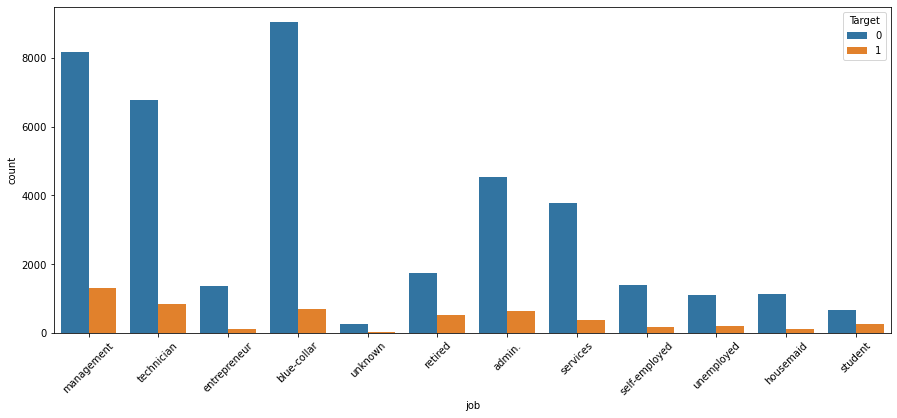

In [12]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job', data=bank_df, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);

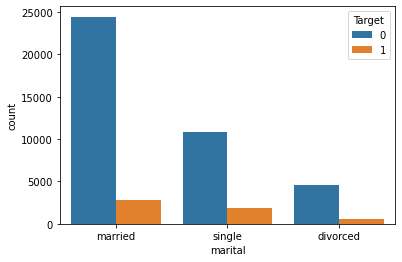

In [13]:
sns.countplot(x='marital', data=bank_df, hue='Target');

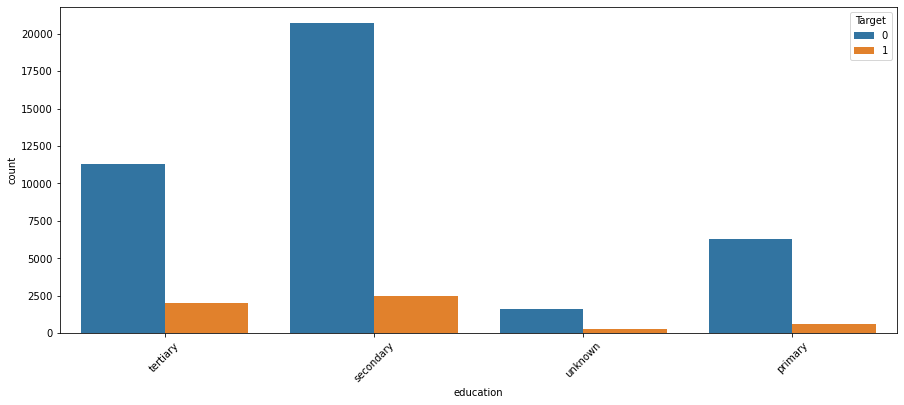

In [14]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='education', data=bank_df, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);

Percent of customer with credit default : 1.8 %
Percent of customer with no credit default : 98.2 %
# Customers with credit default that have term deposit : 52
# Customers with no credit default that have term deposit : 5237


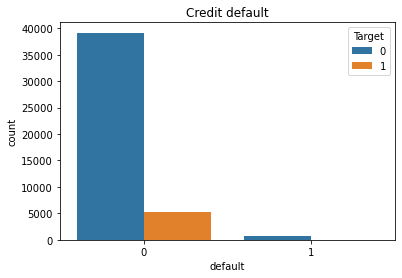

In [15]:
sns.countplot(x='default', data=bank_df, hue='Target');
plt.title("Credit default");
sy = len(bank_df[bank_df.default==1])
sn = len(bank_df[bank_df.default==0])
print('Percent of customer with credit default :', round(sy/(sy+sn)*100,2),"%")
print('Percent of customer with no credit default :', round(sn/(sy+sn)*100,2),"%")
cd = bank_df.Target[(bank_df.default==1)&(bank_df.Target==1)].count()
print('# Customers with credit default that have term deposit :', cd)
cd2 = bank_df.Target[(bank_df.default==0)&(bank_df.Target==1)].count()
print('# Customers with no credit default that have term deposit :', cd2)

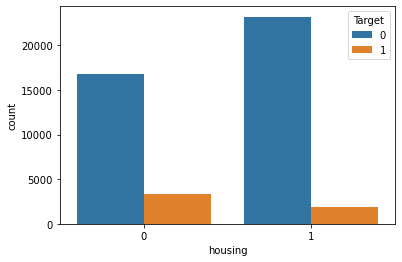

In [16]:
sns.countplot(x='housing', data=bank_df, hue='Target');

In [17]:
pd.crosstab(bank_df.housing, bank_df.Target, normalize=True)

Target,0,1
housing,,
0,0.369976,0.074185
1,0.513039,0.042799


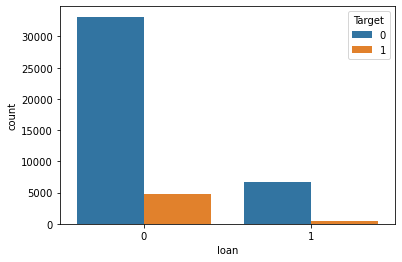

In [18]:
sns.countplot(x='loan', data=bank_df, hue='Target');

In [19]:
pd.crosstab(bank_df.loan, bank_df.Target, normalize=True)

Target,0,1
loan,,
0,0.733494,0.106279
1,0.149521,0.010705


Customer with negative balance account : 3766 / 8.33 %
Customer with zero balance account : 3514 / 7.77 %
Customer with balance account between <0, 5,000] : 35086 / 77.61 %
Customer with balance account higher than 5,000 : 2845 / 6.29 %
Average customer balance : 1362.27
Right skewed distribution (mean - median is positive) : 914.27


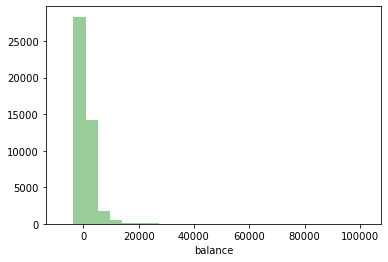

In [20]:
nbc = bank_df.balance[bank_df.balance<0].count()
print('Customer with negative balance account :',nbc, '/', round(nbc/bank_df.shape[0]*100,2),"%")
zbc=bank_df.balance[bank_df.balance==0].count()
print('Customer with zero balance account :', zbc, '/', round(zbc/bank_df.shape[0]*100,2),"%")
pbc = bank_df.balance[(bank_df.balance>0) & (bank_df.balance<=5000)].count()
print('Customer with balance account between <0, 5,000] :', pbc, '/', round(pbc/bank_df.shape[0]*100,2),"%")
hbc = bank_df.balance[bank_df.balance>5000].count()
print('Customer with balance account higher than 5,000 :', hbc, '/', round(hbc/bank_df.shape[0]*100,2),"%")
sns.distplot(bank_df.balance, kde=False, bins=25, color='g');
ban_median = bank_df.balance.median()
ban_mean = bank_df.balance.mean()
print('Average customer balance :', round(ban_mean,2))
print('Right skewed distribution (mean - median is positive) :',round(ban_mean-ban_median,2))

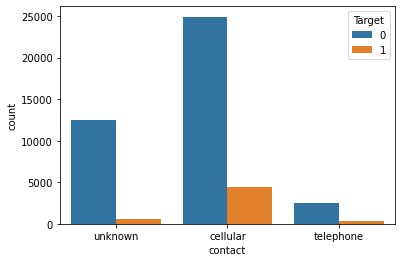

In [21]:
sns.countplot(x='contact', data=bank_df, hue='Target');

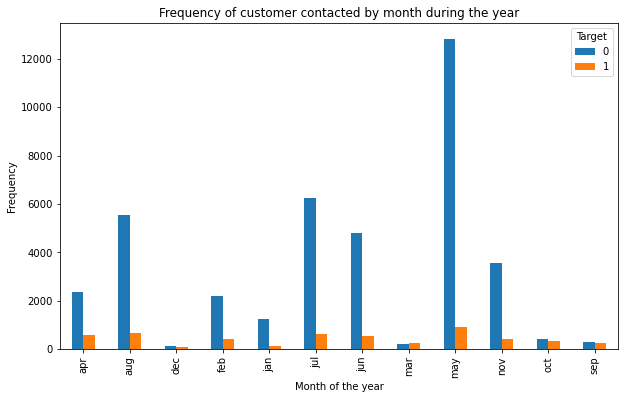

In [22]:
pd.crosstab(bank_df.month,bank_df.Target).plot(kind='bar', figsize=(10,6));
plt.title('Frequency of customer contacted by month during the year');
plt.xlabel('Month of the year');
plt.ylabel('Frequency');

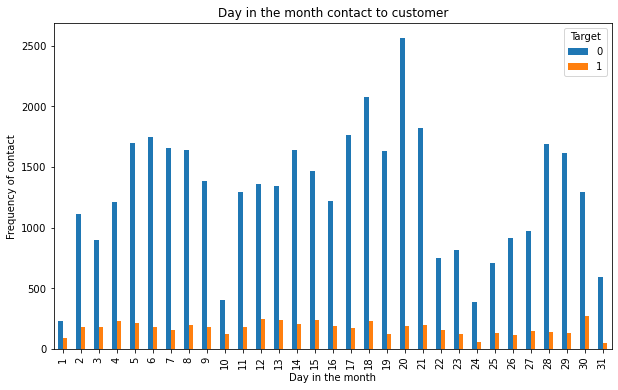

In [23]:
pd.crosstab(bank_df.day,bank_df.Target).plot(kind='bar',figsize=(10,6));
plt.title('Day in the month contact to customer');
plt.xlabel('Day in the month');
plt.ylabel('Frequency of contact');

Average contact duration time in seconds : 258.16
Data shows a right skewed distribution


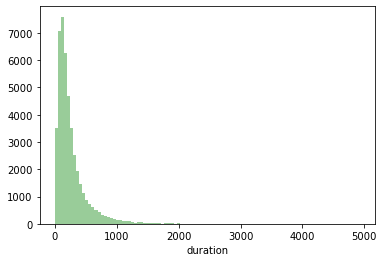

In [24]:
sns.distplot(bank_df.duration, kde=False, bins=100, color='g');
bank_median = bank_df.duration.median()
bank_mean = round(bank_df.duration.mean(),2)
print('Average contact duration time in seconds :',bank_mean)
print('Data shows a right skewed distribution')

Customer were contacted in Average : 2.76 times


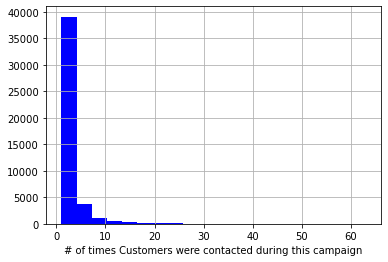

In [25]:
print('Customer were contacted in Average :',round(bank_df.campaign.mean(),2),'times')
bank_df.campaign.hist(bins=20, color='blue');
plt.xlabel('# of times Customers were contacted during this campaign');


Customer contacted from previous campaign : 8257 or 18.26 %
Customer no contacted from previous campaign: 36954 or 81.74 %


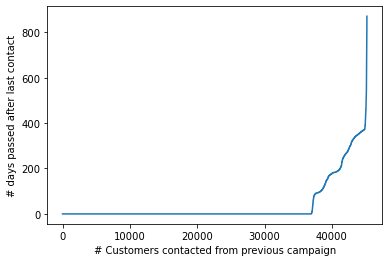

In [26]:
#pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
cnc = bank_df.pdays[bank_df.pdays==-1].count()
cc = bank_df.shape[0]-cnc
print('Customer contacted from previous campaign :',cc, 'or', round(cc/bank_df.shape[0]*100,2),'%')
print('Customer no contacted from previous campaign:',cnc, 'or', round(cnc/bank_df.shape[0]*100,2),'%')
bank_df.pdays.sort_values(ignore_index=True).plot();
plt.xlabel('# Customers contacted from previous campaign');
plt.ylabel('# days passed after last contact');
#bank_df.pdays.hist(bins=20);

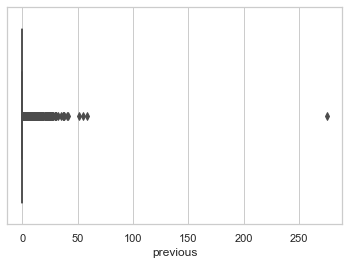

In [27]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_df.previous)

In [28]:
bank_df.loc[bank_df.previous > 250, 'previous'] = bank_df.previous.median()

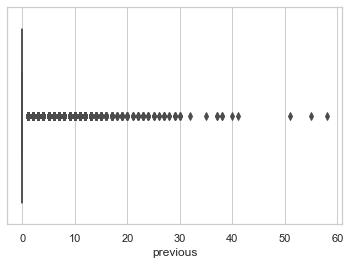

In [29]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_df.previous)

Average times contacted by Customer before this campaign : 3.14


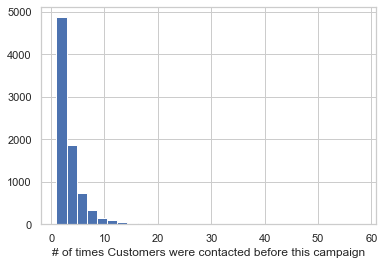

In [30]:
#previous: number of contacts performed before this campaign and for this client
pc = bank_df.previous[bank_df.previous>0].mean()
print('Average times contacted by Customer before this campaign :',round(pc,2))
bank_df.previous[bank_df.previous>0].hist(bins=30);
plt.xlabel('# of times Customers were contacted before this campaign');

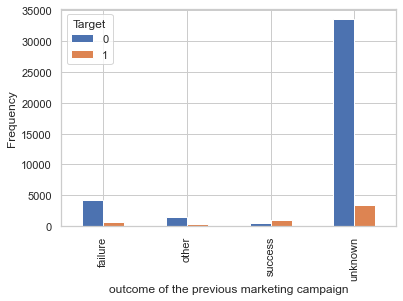

In [31]:
#outcome of the previous marketing campaign
pd.crosstab(bank_df.poutcome, bank_df.Target).plot(kind='bar')
plt.xlabel('outcome of the previous marketing campaign');
plt.ylabel('Frequency');

Percent of subscriptors to term deposit : 11.7 %
Percent of no subscriptors to term deposit : 88.3 %


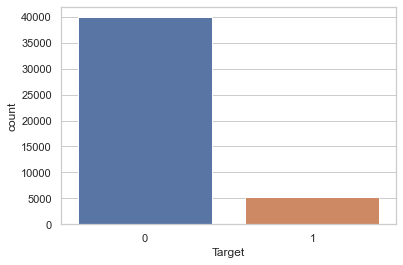

In [32]:
sy = len(bank_df.Target[bank_df.Target==1])
sn = len(bank_df.Target[bank_df.Target==0])
print('Percent of subscriptors to term deposit :', round(sy/(sy+sn)*100,2),'%')
print('Percent of no subscriptors to term deposit :', round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target', data=bank_df);

In [33]:
round(bank_df.groupby('Target').mean(),2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.84,0.02,1303.71,0.58,0.17,15.89,221.18,2.85,36.42,0.50
1,41.67,0.01,1804.27,0.37,0.09,15.16,537.29,2.14,68.70,1.17


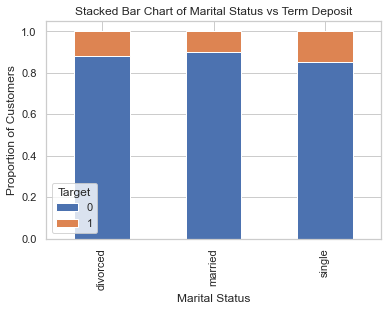

In [34]:
# Marital Status
table=pd.crosstab(bank_df.marital, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of Marital Status vs Term Deposit');
plt.xlabel('Marital Status');
plt.ylabel('Proportion of Customers');

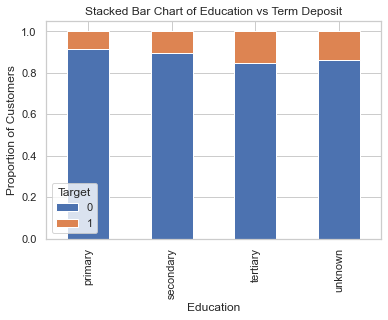

In [35]:
# Education Status
table=pd.crosstab(bank_df.education, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Term Deposit');
plt.xlabel('Education');
plt.ylabel('Proportion of Customers');

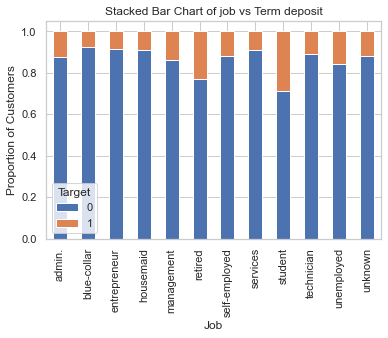

In [36]:
#Job Status
table=pd.crosstab(bank_df.job, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of job vs Term deposit');
plt.xlabel('Job');
plt.ylabel('Proportion of Customers');

In [37]:
# Preparing data for pairplot
biv = bank_df.copy()
# dropping columns with unique values below 5
for nun in bank_df:
    if bank_df[nun].nunique()<5:
        biv.drop(columns=nun, inplace=True)
biv.shape

(45211, 9)

In [38]:
# choosing no object data type
biv.select_dtypes(exclude ='object').shape

(45211, 7)

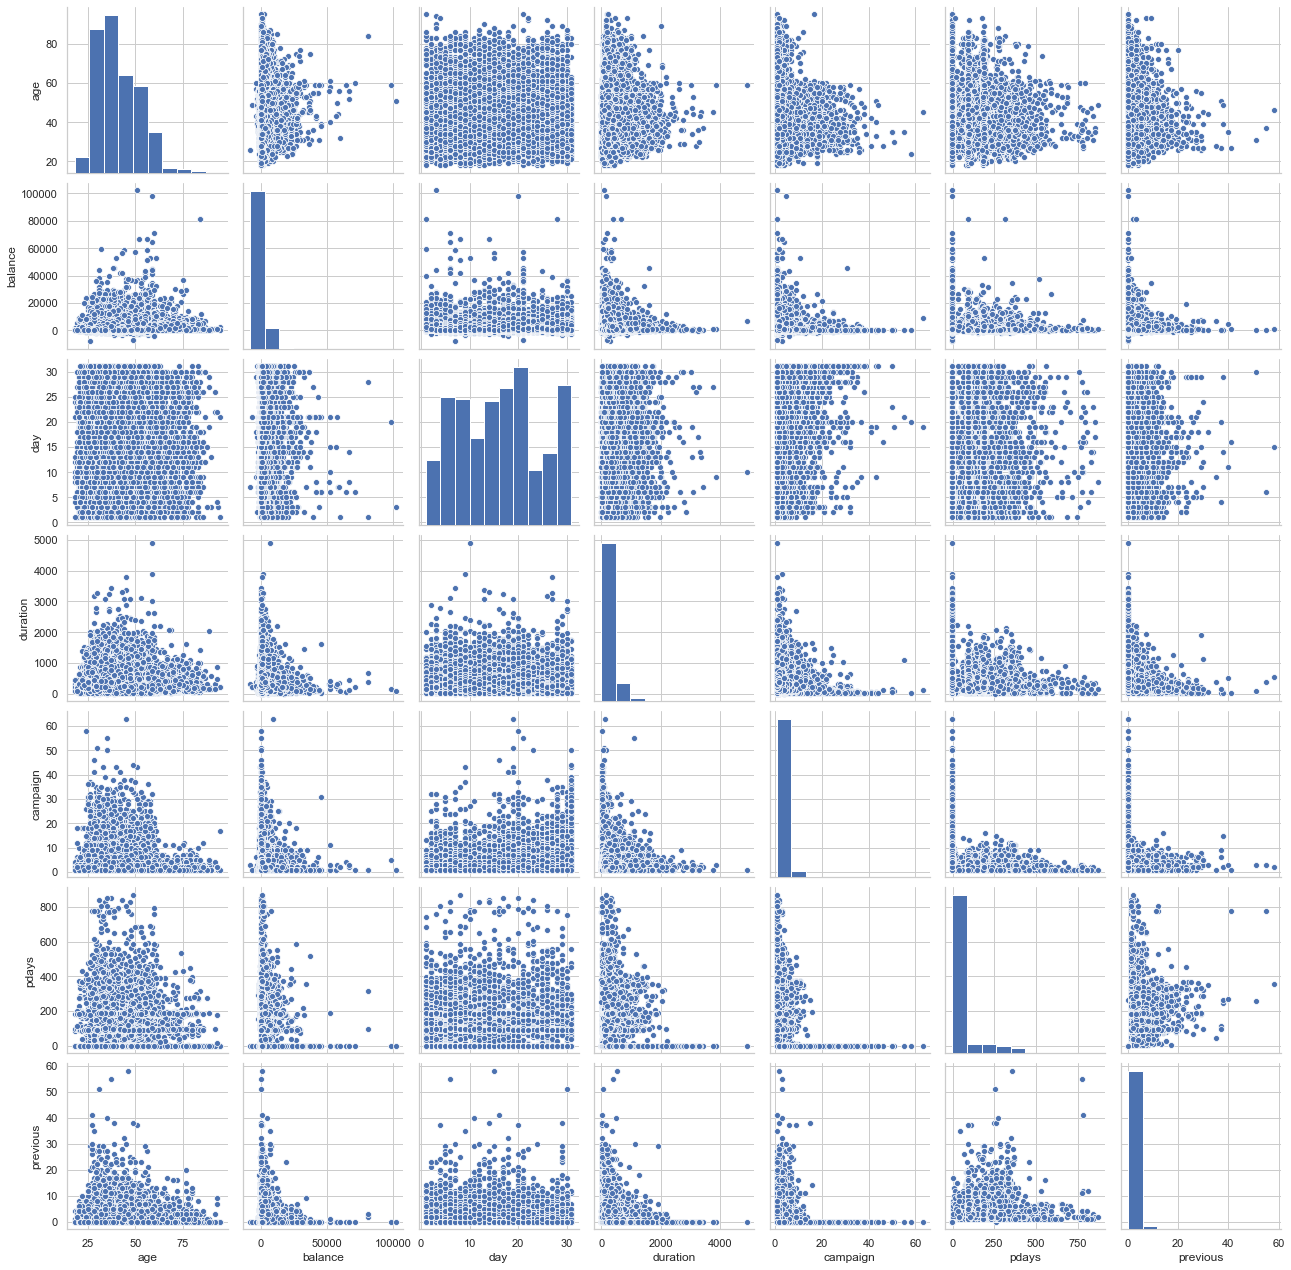

In [39]:
sns.pairplot(biv.select_dtypes(exclude ='object'));

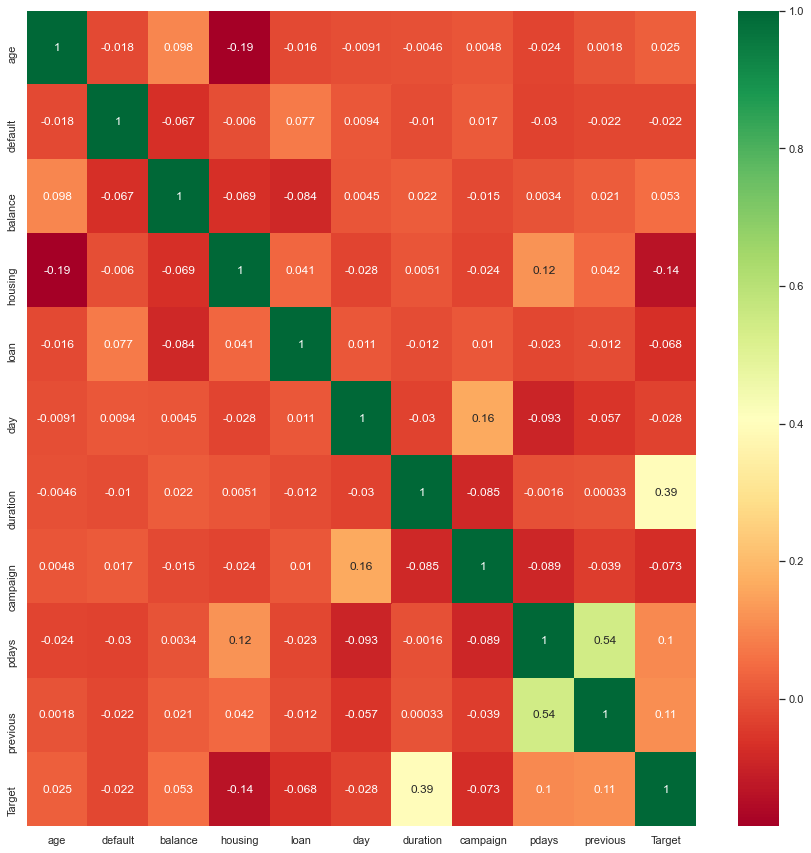

In [40]:
corrmat = bank_df.corr()
top_corr_features =corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(bank_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
col_obj =bank_df.select_dtypes(include ='object')
for nun in col_obj:
    bank_df[nun] = bank_df[nun].astype('category')

In [42]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  float64 
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(6), float64(1), int64(10)
memory usage: 4.1 MB


In [43]:
bank_df.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       40
poutcome        4
Target          2
dtype: int64

In [44]:
data = pd.get_dummies(bank_df, columns=['job','marital','education','default','housing','loan','contact','day','month','poutcome'])

In [45]:
data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'month_apr', 'month_aug',
       'month_dec', 'month_

In [46]:
data.isnull().count()

age                 45211
balance             45211
duration            45211
campaign            45211
pdays               45211
                    ...  
month_sep           45211
poutcome_failure    45211
poutcome_other      45211
poutcome_success    45211
poutcome_unknown    45211
Length: 82, dtype: int64

In [47]:
data.shape

(45211, 82)

In [48]:
X = data.drop(columns=['Target'])
X.shape

(45211, 81)

In [49]:
y = data['Target']
y.shape

(45211,)

In [50]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100), '- total of', len(X_train))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100),'- total of', len(X_test))

70.00% data is in training set - total of 31647
30.00% data is in test set - total of 13564


Percent of subscriptors to term deposit : 11.7 %
Percent of no subscriptors to term deposit : 88.3 %


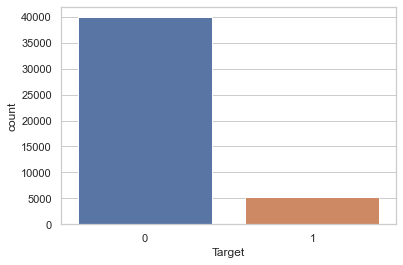

In [52]:
#Target analysis
sy = len(bank_df.Target[bank_df.Target==1])
sn = len(bank_df.Target[bank_df.Target==0])
print('Percent of subscriptors to term deposit :', round(sy/(sy+sn)*100,2),'%')
print('Percent of no subscriptors to term deposit :', round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target', data=bank_df);

In [53]:
# Using the initial set of variables X & y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

ms = SMOTE(random_state=0)
X_res, y_res = ms.fit_sample(X_train, y_train)

In [54]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_res))
print("Number of no term deposit in oversampled data",len(y_res[y_res==0]))
print("Number of term deposit",len(y_res[y_res==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_res[y_res==0])/len(X_res))
print("Proportion of subscription data in oversampled data is ",len(y_res[y_res==1])/len(X_res))

length of oversampled data is  55906
Number of no term deposit in oversampled data 27953
Number of term deposit 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


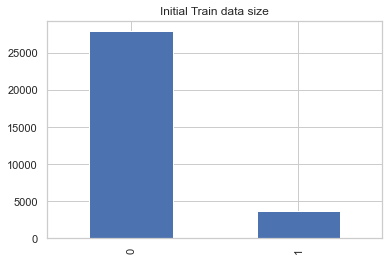

In [55]:
# initial train data size
ini = pd.Series(y_train).value_counts().plot.bar();
plt.title('Initial Train data size');

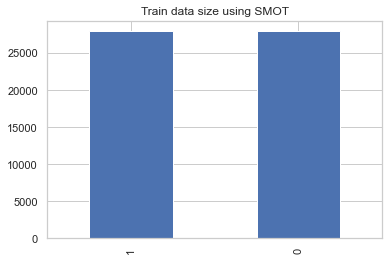

In [56]:
# New train data set has been balanced using SMOT
pd.Series(y_res).value_counts().plot.bar()
plt.title('Train data size using SMOT');

In [ ]:
#Create an Ensemble model


In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

sc_tra,sc_tes,TPf,TNf,FPf,FNf = 0,0,0,0,0,0
Rec,Spec,Pres,Accu,f1,logit_roc_auc = 0,0,0,0,0,0

def score_confmetrics(model, X_train, y_train, X_test, y_test):
    global sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc
    ml_train = model.fit(X_train, y_train)
    sc_tra = round(ml_train.score(X_train, y_train),4)
    sc_tes = round(ml_train.score(X_test, y_test),4)
    # prediction
    y_predict = model.predict(X_test)
    #score the model
    print('\n' * 1)
    print('Model score_train :',round(sc_tra,4))
    print('Model score_test :',round(sc_tes,4))
    # confusion metrics
    confusion=confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    #Metric data
    print('\n' * 1)
    TPf = confusion[1,1]
    TNf = confusion[0,0]
    FPf = confusion[1,0]
    FNf = confusion[0,1]
    # classification report
    Rec = round(TPf/float(TPf+FNf),4)
    Spec = round(TNf/float(TNf+FPf),4)
    Pres = round(TPf/float(TPf+FPf),4)
    #Accu = round((TPf+TNf)/float(TPf+TNf+FPf+FNf),4)
    f1 = round(2*Pres*Rec/(Pres+Rec),4)
    print(classification_report(y_predict, y_test))
     # ROC Curve
    logit_roc_auc = round(roc_auc_score(y_test, model.predict(X_test)),4)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    # output
    return(sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc)

    

In [ ]:
#Logistic Regression Model

In [58]:
from sklearn.linear_model import LogisticRegression
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [59]:
clas_LR = LogisticRegression()
params_LR={
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  :['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' :[100, 1000, 2000, 3000, 4000]
}
random_searchLR=RandomizedSearchCV(clas_LR,param_distributions=params_LR,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [60]:
random_searchLR.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.9min remaining:   35.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.6min finished
C:\Users\Arulprakash_palanive\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [61]:
random_searchLR.best_params_

{'solver': 'sag', 'penalty': 'none', 'max_iter': 2000}



Model score_train : 0.9044
Model score_test : 0.9006


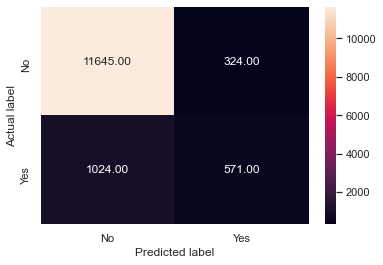



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12669
           1       0.36      0.64      0.46       895

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.70     13564
weighted avg       0.93      0.90      0.91     13564



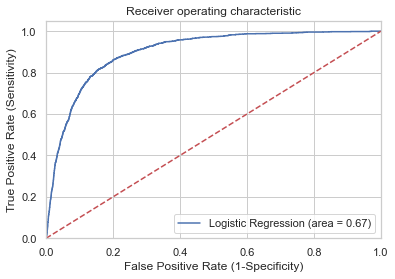

In [62]:
# Fit the model on train
model_LR = LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 4000, random_state=1)
# calling score_confmetrics funtion
model = model_LR
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_LR, ste_LR, TP_LR, TN_LR,FP_LR, FN_LR = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_LR,S_LR,P_LR,A_LR,f1_LR,l_LR = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#Decision Tree Model



Model score_train : 1.0
Model score_test : 0.8766


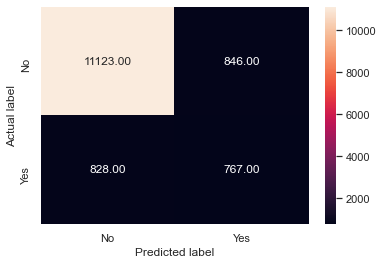



              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11951
           1       0.48      0.48      0.48      1613

    accuracy                           0.88     13564
   macro avg       0.71      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



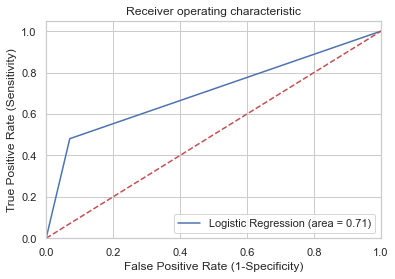

In [63]:
# decision tree number
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
# calling score_confmetrics funtion
model = dTree
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DT, ste_DT, TP_DT, TN_DT,FP_DT, FN_DT = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DT,S_DT,P_DT,A_DT,f1_DT,l_DT = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#Regularization

In [64]:
clas_DTr = DecisionTreeClassifier()
#
params_DTr={
    'criterion'        :['gini','entropy'],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split':[ 2, 3, 5, 7, 10],
    'min_samples_leaf' :[ 1, 2, 3, 5, 7, 10],
}
#
random_searchDT=RandomizedSearchCV(clas_DTr,param_distributions=params_DTr,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [65]:
random_searchDT.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished


In [66]:
random_searchDT.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'entropy'}



Model score_train : 0.9042
Model score_test : 0.8971


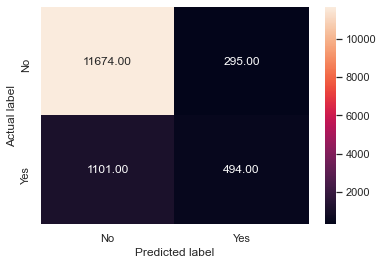



              precision    recall  f1-score   support

           0       0.98      0.91      0.94     12775
           1       0.31      0.63      0.41       789

    accuracy                           0.90     13564
   macro avg       0.64      0.77      0.68     13564
weighted avg       0.94      0.90      0.91     13564



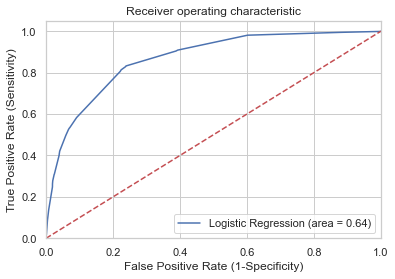

In [67]:
# decision tree number
dTree_r = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=10, random_state=1 )
# calling score_confmetrics funtion
model = dTree_r
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DTr, ste_DTr, TP_DTr, TN_DTr,FP_DTr, FN_DTr = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DTr,S_DTr,P_DTr,A_DTr,f1_DTr,l_DTr = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#Visualization - Reducing over fitting

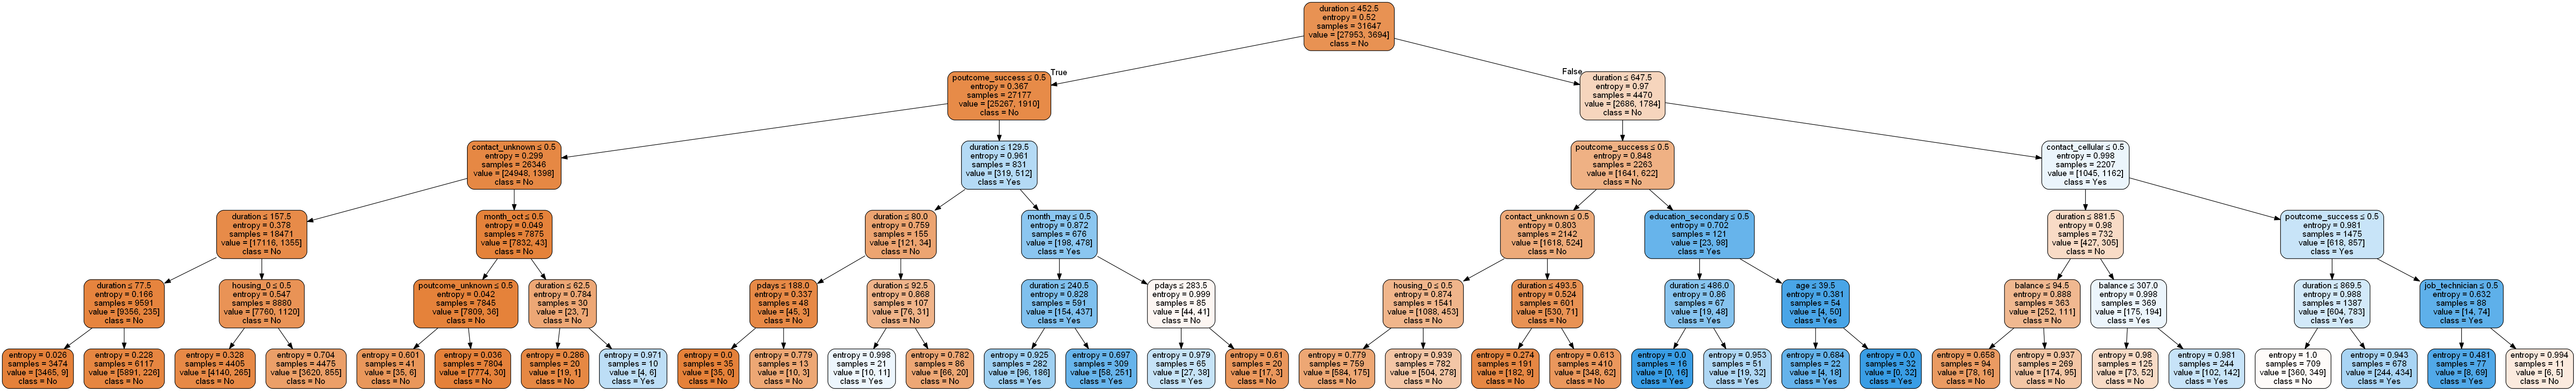

In [68]:
from sklearn.tree import export_graphviz
import io
from io import StringIO
from IPython.display import Image
import pydotplus
import graphviz
#
xvar = data.drop(columns=['Target'])
feature_cols = xvar.columns
train_char_label = ['No', 'Yes']

bank_tar = StringIO()
export_graphviz(dTree_r, out_file=bank_tar,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=train_char_label)
graph_bt = pydotplus.graph_from_dot_data(bank_tar.getvalue())  
graph_bt.write_png('bank_target.png')
Image(graph_bt.create_png())

In [ ]:
#Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier

In [70]:
clas_B = BaggingClassifier()
#
params_B={
    'n_estimators' :[10, 25, 50, 75, 100],
    'max_samples'  :[0.01, 0.1, 0.5, 0.75, 1.0],
    'max_features'  :[0.01, 0.1, 0.5, 0.75, 1.0]
}
#
random_searchB=RandomizedSearchCV(clas_B,param_distributions=params_B,
                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [71]:
random_searchB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    8.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.4s finished


In [72]:
random_searchB.best_params_

{'n_estimators': 25, 'max_samples': 0.5, 'max_features': 0.75}



Model score_train : 0.8988
Model score_test : 0.8924


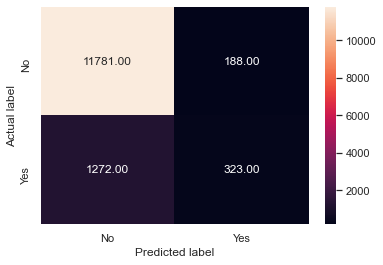



              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13053
           1       0.20      0.63      0.31       511

    accuracy                           0.89     13564
   macro avg       0.59      0.77      0.62     13564
weighted avg       0.95      0.89      0.92     13564



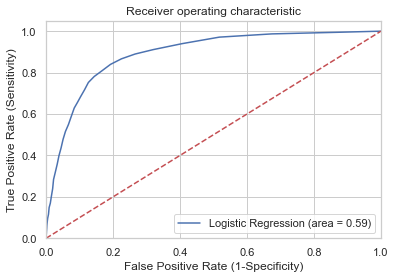

In [73]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= 0.01,max_features= 0.75, random_state=1)
# calling score_confmetrics funtion
model = bgcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_bg, ste_bg, TP_bg, TN_bg,FP_bg, FN_bg = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_bg,S_bg,P_bg,A_bg,f1_bg,l_bg = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#Random Forest classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clas_RF = RandomForestClassifier()
#
params_RF={
    'criterion'        :['gini','entropy'],
    'n_estimators' :[100, 250, 500, 750, 1000],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split' :[2, 3, 5, 7, 10, 15],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10, 15]
}
#
random_searchRF=RandomizedSearchCV(clas_RF,param_distributions=params_RF,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [76]:
random_searchRF.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.6min remaining:   30.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


In [77]:
random_searchRF.best_params_

{'n_estimators': 750,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 13,
 'criterion': 'entropy'}



Model score_train : 0.9174
Model score_test : 0.8983


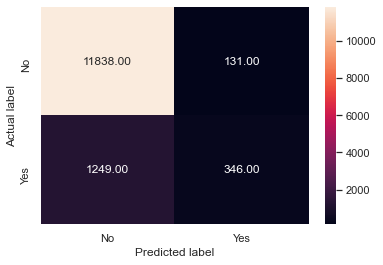



              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13087
           1       0.22      0.73      0.33       477

    accuracy                           0.90     13564
   macro avg       0.60      0.81      0.64     13564
weighted avg       0.96      0.90      0.92     13564



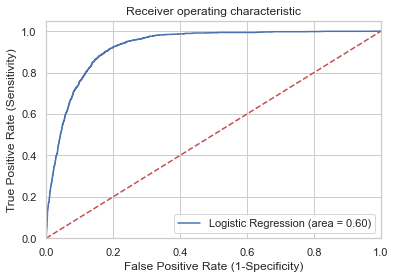

In [78]:
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, max_depth=15, 
                              min_samples_split=15, min_samples_leaf=2,random_state=1)
# calling score_confmetrics funtion
model = rfcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_rf, ste_rf, TP_rf, TN_rf,FP_rf, FN_rf = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_rf,S_rf,P_rf,A_rf,f1_rf,l_rf = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#Ada Boosting

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
clas_AB = AdaBoostClassifier()
#
params_AB={
    'n_estimators' :[50, 100, 150, 200, 250],
    'learning_rate'  :[0.1, 0.3, 0.5, 0.75, 1.0],
}
#
random_searchAB=RandomizedSearchCV(clas_AB,param_distributions=params_AB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [81]:
random_searchAB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   36.4s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   39.8s finished


In [82]:
random_searchAB.best_params_

{'n_estimators': 250, 'learning_rate': 0.3}



Model score_train : 0.9036
Model score_test : 0.898


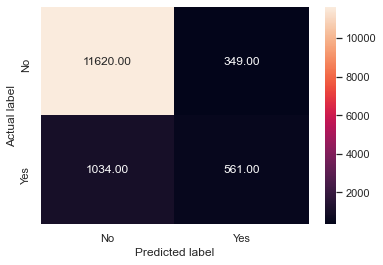



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12654
           1       0.35      0.62      0.45       910

    accuracy                           0.90     13564
   macro avg       0.66      0.77      0.70     13564
weighted avg       0.93      0.90      0.91     13564



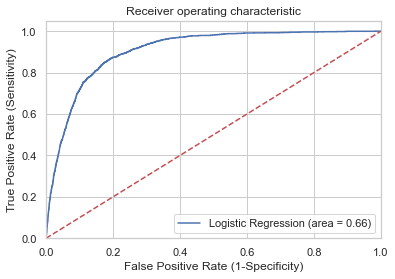

In [83]:
abcl = AdaBoostClassifier(n_estimators=150, learning_rate=0.3, random_state=1)
# calling score_confmetrics funtion
model = abcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_ab, ste_ab, TP_ab, TN_ab,FP_ab, FN_ab = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_ab,S_ab,P_ab,A_ab,f1_ab,l_ab = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#GradientBoost 

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
clas_GB = GradientBoostingClassifier()
#
params_GB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.01, 0.05, 0.075, 0.1],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[2, 3, 5, 7, 10],
}
#
random_searchGB=RandomizedSearchCV(clas_GB,param_distributions=params_GB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [86]:
random_searchGB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   16.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.1s finished


In [87]:
random_searchGB.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'learning_rate': 0.075}



Model score_train : 0.9043
Model score_test : 0.8972


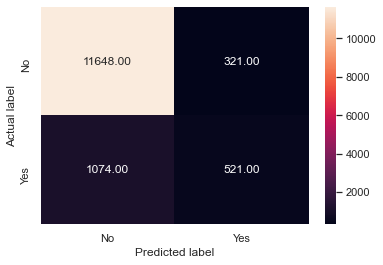



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12722
           1       0.33      0.62      0.43       842

    accuracy                           0.90     13564
   macro avg       0.65      0.77      0.69     13564
weighted avg       0.93      0.90      0.91     13564



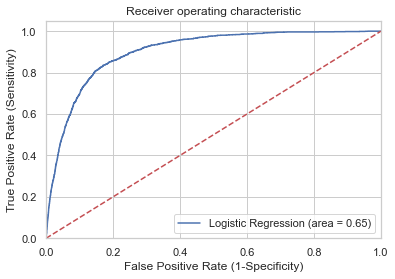

In [88]:
gbcl = GradientBoostingClassifier(n_estimators = 200, max_depth=1, 
                                  learning_rate=0.1, min_samples_leaf=2,
                                  min_samples_split=2, random_state=1)
# calling score_confmetrics funtion
model = gbcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_gb, ste_gb, TP_gb, TN_gb,FP_gb, FN_gb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_gb,S_gb,P_gb,A_gb,f1_gb,l_gb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#LightBGM

In [92]:
import lightgbm as lgbm

In [93]:
clas_LGB = lgbm.LGBMClassifier()
#
params_LGB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.02, 0.04, 0.06, 0.08, 0.1]
}
#
random_searchLGB=RandomizedSearchCV(clas_LGB,param_distributions=params_LGB,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [94]:
random_searchLGB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   22.6s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   23.3s finished


In [95]:
random_searchLGB.best_params_

{'n_estimators': 250, 'learning_rate': 0.06}



Model score_train : 0.9237
Model score_test : 0.904


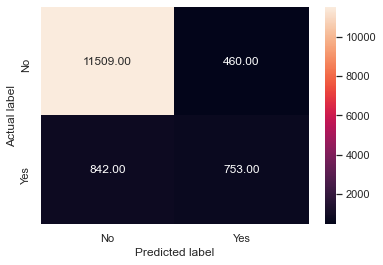



              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12351
           1       0.47      0.62      0.54      1213

    accuracy                           0.90     13564
   macro avg       0.72      0.78      0.74     13564
weighted avg       0.92      0.90      0.91     13564



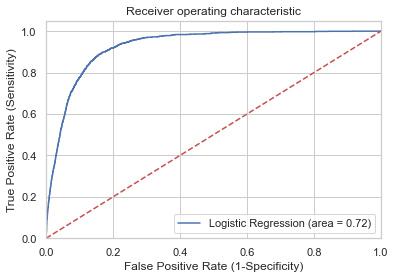

In [96]:
lgbm_m = lgbm.LGBMClassifier(n_estimators = 150, learning_rate=0.04, random_state=1)
# calling score_confmetrics funtion
model = lgbm_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_lgb, ste_lgb, TP_lgb, TN_lgb,FP_lgb, FN_lgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_lgb,S_lgb,P_lgb,A_lgb,f1_lgb,l_lgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

In [ ]:
#Summary

In [100]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression','Decision Tree- Reduce Overfit',
                                    'Bagging','RandomForest - Reduce Overfit',
                                    'AdaBoosting','GradientBoost','LightGBM'], 
                         'Score_Train':   [str_LR,str_DTr,str_bg,str_rf,str_ab,str_gb,str_lgb],
                         'Score_Test':    [ste_LR,ste_DTr,ste_bg,ste_rf,ste_ab,ste_gb,ste_lgb],
                         'True Positive': [ TP_LR, TP_DTr, TP_bg, TP_rf, TP_ab, TP_gb,  TP_lgb],
                         'True Negative': [ TN_LR, TN_DTr, TN_bg, TN_rf, TN_ab, TN_gb,  TN_lgb],
                         'False Positive':[ FP_LR, FP_DTr, FP_bg, FP_rf, FP_ab, FP_gb,  FP_lgb],
                         'False Negative':[ FN_LR, FN_DTr, FN_bg, FN_rf, FN_ab, FN_gb,  FN_lgb],
                         'Recall':        [  R_LR,  R_DTr,  R_bg,  R_rf,  R_ab,  R_gb,   R_lgb],
                         'Specifity':     [  S_LR,  S_DTr,  S_bg,  S_rf,  S_ab,  S_gb,   S_lgb],
                         'Precision':     [  P_LR,  P_DTr,  P_bg,  P_rf,  P_ab,  P_gb,   P_lgb],
                         'F1':            [ f1_LR, f1_DTr, f1_bg, f1_rf, f1_ab, f1_gb, f1_lgb],
                         'Area U_Curve':  [  l_LR,  l_DTr,  l_bg,  l_rf,  l_ab,  l_gb,   l_lgb] })

resultsDf = resultsDf[['Method', 'Score_Train','Score_Test','True Positive','True Negative','False Positive',
                       'False Negative','Recall','Specifity','Precision','F1','Area U_Curve']]

In [101]:
resultsDf=resultsDf.sort_values(by=['Area U_Curve']).set_index('Method')

In [102]:
resultsDf

,Score_Train,Score_Test,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
Method,,,,,,,,,,,
Bagging,0.8988,0.8924,323,11781,1272,188,0.6321,0.9026,0.2025,0.3067,0.5934
RandomForest - Reduce Overfit,0.9174,0.8983,346,11838,1249,131,0.7254,0.9046,0.2169,0.3339,0.6030
Decision Tree- Reduce Overfit,0.9042,0.8971,494,11674,1101,295,0.6261,0.9138,0.3097,0.4144,0.6425
GradientBoost,0.9043,0.8972,521,11648,1074,321,0.6188,0.9156,0.3266,0.4275,0.6499
AdaBoosting,0.9036,0.8980,561,11620,1034,349,0.6165,0.9183,0.3517,0.4479,0.6613
Logistic Regression,0.9044,0.9006,571,11645,1024,324,0.6380,0.9192,0.3580,0.4586,0.6655
LightGBM,0.9237,0.9040,753,11509,842,460,0.6208,0.9318,0.4721,0.5363,0.7168


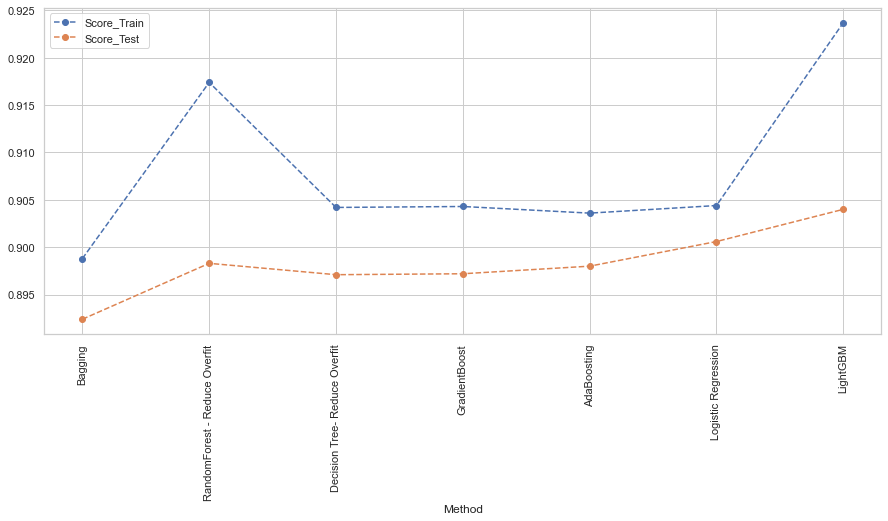

In [104]:
GB=resultsDf[['Score_Train','Score_Test']]
GB.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

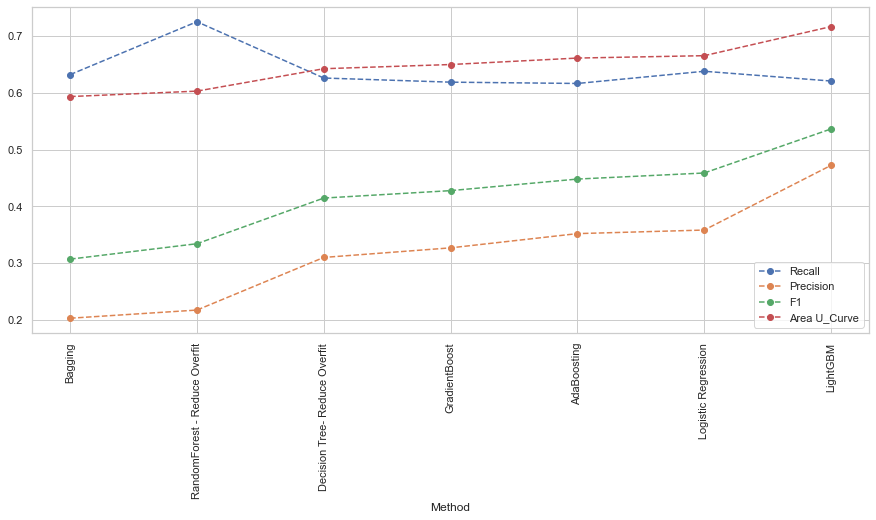

In [105]:
GB =resultsDf[['Recall','Precision','F1', 'Area U_Curve']]
GB.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

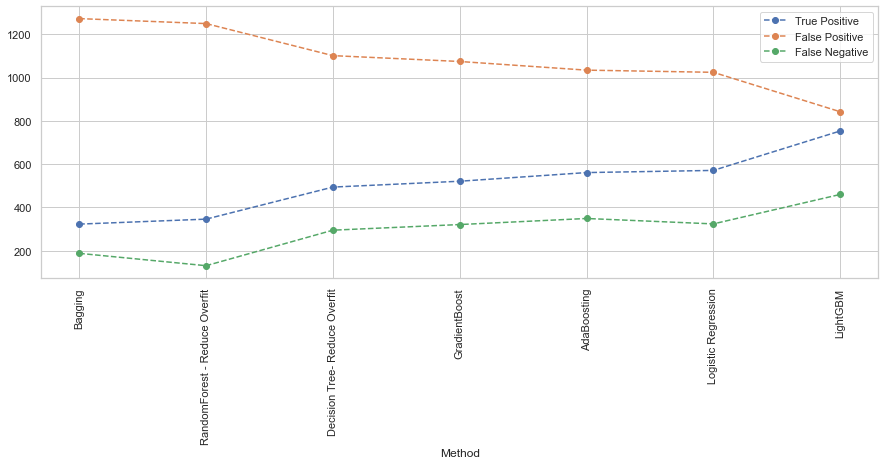

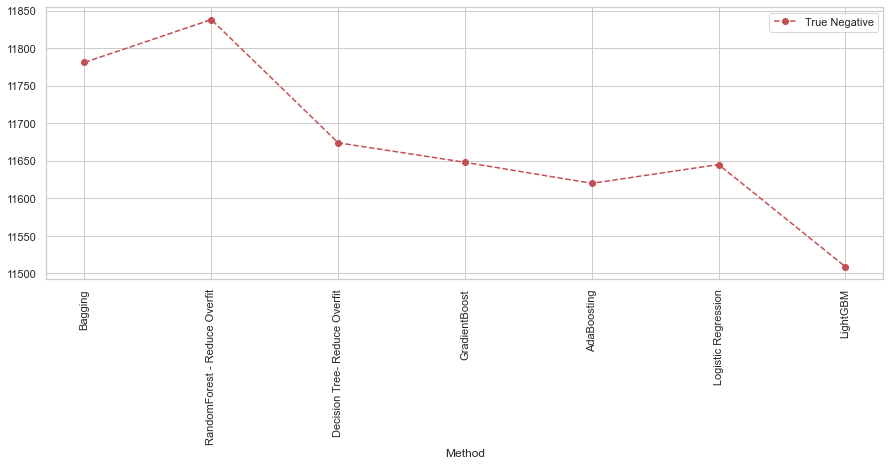

In [106]:
GB = resultsDf[['True Positive','False Positive','False Negative']]
GB.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o');

GB = resultsDf[['True Negative']]
GB.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o', color='r');

In [107]:
resultsDf.describe()

,Score_Train,Score_Test,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.908057,0.898229,509.857143,11673.571429,1085.142857,295.428571,0.639671,0.915129,0.319643,0.417900,0.647486
std,0.008943,0.003542,145.838299,108.013668,145.838299,108.013668,0.038562,0.009784,0.091440,0.077568,0.041342
min,0.898800,0.892400,323.000000,11509.000000,842.000000,131.000000,0.616500,0.902600,0.202500,0.306700,0.593400
25%,0.903900,0.897150,420.000000,11632.500000,1029.000000,241.500000,0.619800,0.909200,0.263300,0.374150,0.622750
50%,0.904300,0.898000,521.000000,11648.000000,1074.000000,321.000000,0.626100,0.915600,0.326600,0.427500,0.649900
75%,0.910900,0.899450,566.000000,11727.500000,1175.000000,336.500000,0.635050,0.918750,0.354850,0.453250,0.663400
max,0.923700,0.904000,753.000000,11838.000000,1272.000000,460.000000,0.725400,0.931800,0.472100,0.536300,0.716800


In [ ]:
#Conclusion

In [ ]:
1.LightBGM is the best performaing algorithm
2.RandomForest is the worst performing algorithm